In [ ]:
import pandas as pd

file_path = 'data_normalizada.csv'
data = pd.read_csv(file_path)
data.head()

,Capture Date,Name,Symbol,Website,Twitter,Reddit,Reddit Subscribers,Category,Twitter Followers,YouTube Videos
0,2024-09-22,Dogecoin,DOGE,1,1,1,1.000000,3,1.000000,1.0
1,2024-09-22,Dogecoin,DOGE,1,1,1,1.000000,3,1.000000,1.0
2,2024-09-22,Chainlink,LINK,1,1,1,0.034049,2,0.297304,1.0
3,2024-09-22,Avalanche,AVAX,1,1,1,0.020894,2,0.259462,1.0
4,2024-09-22,Shiba Inu,SHIB,1,1,1,0.210448,3,0.191734,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer

#Define las características y la variable objetivo
features = ["Website", "Twitter", "Reddit", "Reddit Subscribers", "Category", "Twitter Followers", "YouTube Videos"]

#Verifica si todas las columnas están en el DataFrame
missing_cols = [col for col in features if col not in data.columns]
if missing_cols:
    raise ValueError(f"Faltan columnas en 'data': {missing_cols}")

X = data[features]

#Combina las métricas para crear una nueva variable objetivo "Activity Level"
#Binearemos la suma de métricas de redes sociales en 3 categorías: "nada" (bajo), "poco" (medio), "mucho" (alto)
activity_metrics = data[["Twitter Followers", "Reddit Subscribers", "YouTube Videos"]].sum(axis=1)
est = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform")
y = est.fit_transform(activity_metrics.values.reshape(-1, 1)).flatten()

#Mapea las etiquetas codificadas a los nombres correspondientes
activity_labels = {0: "nada", 1: "poco", 2: "mucho"}
y = pd.Series(y).map(activity_labels)

#Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Se inicializa el clasificador Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Se entrena el modelo
rf_model.fit(X_train, y_train)

#Se realizan predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

#Generar un reporte de clasificación para evaluar el rendimiento, forzando etiquetas completas
classification_report_output = classification_report(
    y_test, y_pred,
    labels=list(activity_labels.values()),
    target_names=list(activity_labels.values()),
    zero_division=0
)

print(classification_report_output)

              precision    recall  f1-score   support

        nada       0.91      0.83      0.87        12
        poco       0.96      0.98      0.97        56
       mucho       0.00      0.00      0.00         0

    accuracy                           0.96        68
   macro avg       0.62      0.61      0.61        68
weighted avg       0.96      0.96      0.96        68



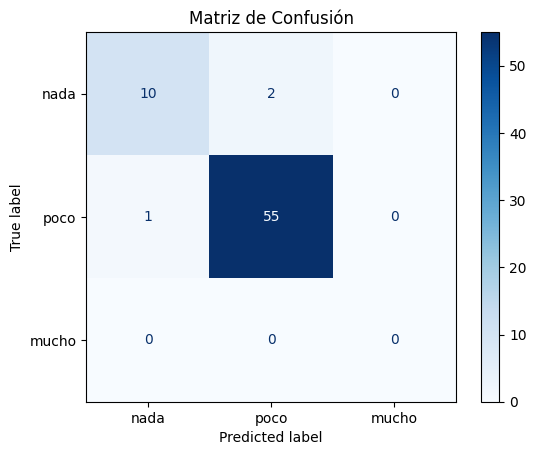

<ipython-input-12-238b59ec2bf3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')


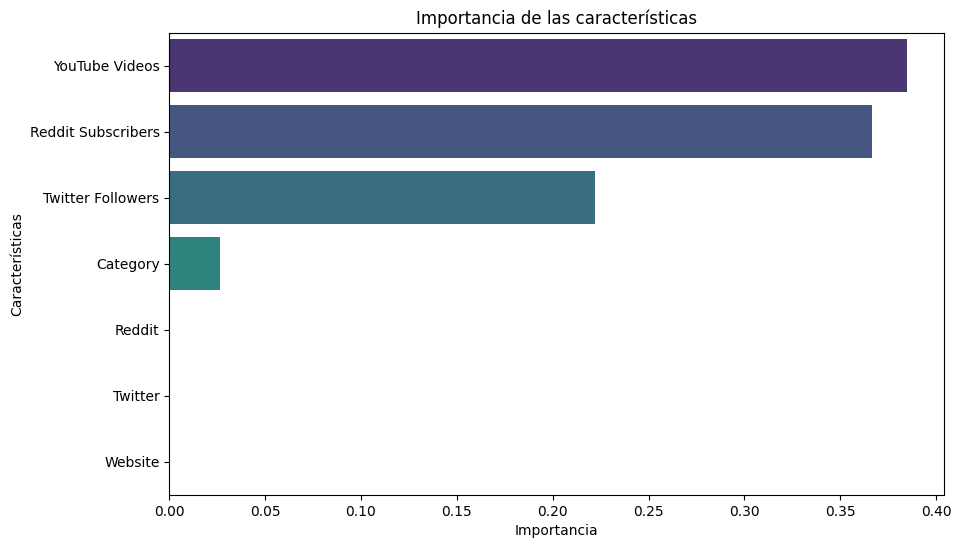

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.show()

plot_confusion_matrix(y_test, y_pred, labels=list(activity_labels.values()))

# Importancia de las características
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_features = [features[i] for i in indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
    plt.title("Importancia de las características")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

plot_feature_importance(rf_model, features)

Con los cambios y mejoras

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 42}
              precision    recall  f1-score   support

        nada       0.95      1.00      0.98        20
        poco       1.00      0.92      0.96        24
       mucho       0.92      0.96      0.94        24

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



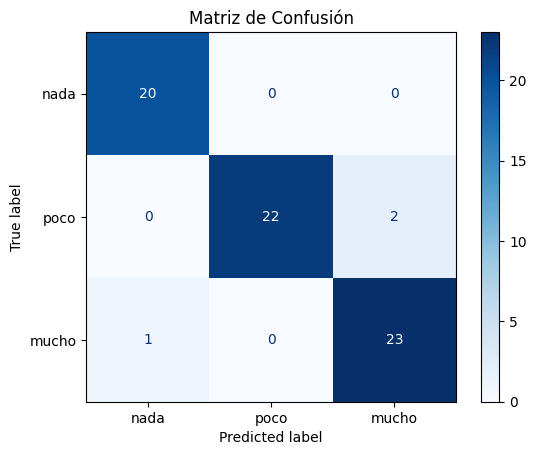

<ipython-input-13-5b313082d1d3>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')


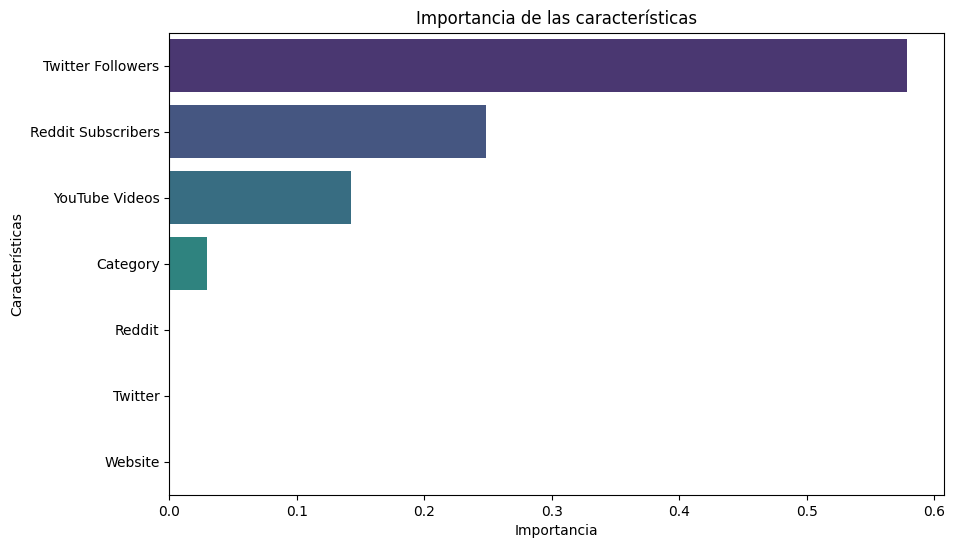

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import KBinsDiscretizer

features = ["Website", "Twitter", "Reddit", "Reddit Subscribers", "Category", "Twitter Followers", "YouTube Videos"]

#Verificación de columnas en el DataFrame
missing_cols = [col for col in features if col not in data.columns]
if missing_cols:
    raise ValueError(f"Faltan columnas en 'data': {missing_cols}")

X = data[features]

#Ajuste de Discretización para la Variable Objetivo
activity_metrics = data[["Twitter Followers", "Reddit Subscribers", "YouTube Videos"]].sum(axis=1)
est = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")  # Cambia estrategia a "quantile"
y = est.fit_transform(activity_metrics.values.reshape(-1, 1)).flatten()

# Mapear las etiquetas codificadas a los nombres correspondientes
activity_labels = {0: "nada", 1: "poco", 2: "mucho"}
y = pd.Series(y).map(activity_labels)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de GridSearchCV para hiperparámetros de Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],         # Diferentes números de árboles
    'max_depth': [None, 10, 20, 30],        # Profundidad máxima de los árboles
    'min_samples_leaf': [1, 2, 4],          # Mínimo de muestras por hoja
    'random_state': [42]
}

# GridSearch con validación cruzada
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo de Random Forest
best_rf_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Predicciones con el mejor modelo
y_pred = best_rf_model.predict(X_test)

# Reporte de clasificación y matriz de confusión
classification_report_output = classification_report(
    y_test, y_pred,
    labels=list(activity_labels.values()),
    target_names=list(activity_labels.values()),
    zero_division=0
)
print(classification_report_output)

# Gráfico de la matriz de confusión
def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.show()

plot_confusion_matrix(y_test, y_pred, labels=list(activity_labels.values()))

# Gráfico de importancia de características
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_features = [features[i] for i in indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
    plt.title("Importancia de las características")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

plot_feature_importance(best_rf_model, features)